In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


# <font color = blue> Lead Scoring Assignment </font>

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the `Leads.csv` file. Store it in a variable called `data`. 

### Subtask 1.1 Data Reading & Data Types 

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
data = pd.read_csv(r'D:\Study Material\Upgrad\Nov 20 Course\Lead Case Study\Lead Scoring Assignment\Leads.csv')


In [4]:
data.shape
        

(9240, 37)

In [5]:
# Code for getting the statistical data for every field in the columns
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspecting Null values in data file 

Finding out the number of Null values in all the columns and rows. Also, finding the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [7]:
100*round(data.isna().sum()/data.shape[0],2)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

-  ### Subtask 2.2: Dropping unecessary columns
-  #### Subtask 2.2.1 For Data file 

For this assignment, we will mostly be analyzing the leads which can be converted. So many of the columns in the data dataframe which dont have any real value addition and the ones having very high number of missing values may be deleted. So we may drop the following columns which comprise of missing values > 30%. The columns which may be deleted are stated below:-.

-  Prospect ID
-  Lead Number
-  Tags
-  Last Activity
-  Asymmetrique Activity Index
-  Asymmetrique Profile Index
-  Asymmetrique Activity Score
-  Asymmetrique Profile Score
-  Last Notable Activity


In [8]:
data_new = data.drop(data.loc[:, 'Prospect ID':'Lead Number'], axis = 1)
data_new = data_new.drop(data.loc[:, 'Asymmetrique Activity Index':'Asymmetrique Profile Score'], axis = 1)
data_new.drop(['Tags'], axis = 1, inplace = True)
data_new.drop(['Last Activity'], axis = 1, inplace = True)
data_new.drop(['Last Notable Activity'], axis = 1, inplace = True)


In [9]:
data_new['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [10]:
data_new['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [11]:
data_new['City'].value_counts(normalize = True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [12]:
data_new['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
South Africa            0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
Bangladesh              0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Italy                   0.000295
Ghana                   0.000295
Philippines             0.000295
Netherlands             0.000295
Uganda                  0.000295
Belgium                 0.000295
Indonesia               0.000148
Vietnam                 0.000148
Denmark   

In [13]:
data_new['Specialization'].value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [14]:
data_new['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

- Since `How did you hear about X Education`, `Lead Profile`, `Specialization` and `City` contain >30% values as `Select` which in turn signies Null values tally > 30% of the total values really so we may delete these columns from the table

In [15]:
data_new.drop(['How did you hear about X Education'], axis = 1, inplace = True)
data_new.drop(['Lead Profile'], axis = 1, inplace = True)
data_new.drop(['Lead Quality'], axis = 1, inplace = True)
data_new.drop(['City'], axis = 1, inplace = True)
data_new.drop(['Specialization'], axis = 1, inplace = True)
data_new.shape

(9240, 23)

- Since `Country` column has many countries but their number of occurence is very low we may club countries other than `India` as `Others`

In [16]:
data_new['Country'] = data_new['Country'].apply(lambda x: 'Others' if x != 'India' else x)
data_new['Country'].value_counts()

India     6492
Others    2748
Name: Country, dtype: int64

In [17]:
data_new['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
youtubechannel       0.000109
testone              0.000109
blog                 0.000109
WeLearn              0.000109
Name: Lead Source, dtype: float64

- Since `Lead Source` column has many options but their number of occurence is very low i.e. < 2%. we may club them as `Others`

In [18]:
data_new['Lead Source'] = data_new['Lead Source'].apply(lambda x: 'Others' if (x not in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference'] ) else x)
data_new['Lead Source'].value_counts()
#(x == 'Google')|(x == 'Direct Traffic')|(x == 'Direct Traffic')

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             386
Name: Lead Source, dtype: int64

In [19]:
data_new['Lead Source'].value_counts(normalize = True)

Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.041775
Name: Lead Source, dtype: float64

In [20]:
100*round(data_new.isna().sum()/data_new.shape[0],4)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

-  ### Subtask 2.3: Filling the NaN values 
-  #### Subtask 2.3.1 For data file 

We may impute the `TotalVisits`and `Page Views Per Visit` column with the mean values and the `Country`, `What is your current occupation` and `What matters most to you in choosing a course` columns with the mode values  of the respective columns and `Lead Quality` with `Not Sure`.

In [21]:
data_new['What matters most to you in choosing a course'].mode()[0]

'Better Career Prospects'

In [22]:
values = {'TotalVisits': data_new['TotalVisits'].mean(),
         'Page Views Per Visit': data_new['Page Views Per Visit'].mean(),
         'Lead Source': data_new['Lead Source'].mode()[0],
         'Country': data_new['Country'].mode()[0],
         'What is your current occupation': data_new['What is your current occupation'].mode()[0],
         'What matters most to you in choosing a course': data_new['What matters most to you in choosing a course'].mode()[0]}
data_new.fillna(value = values, inplace = True)    
data_new.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [23]:
# Converting the `TotalVisits` to int type
data_new['TotalVisits'] = data_new['TotalVisits'].astype('int64') 

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [24]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
            'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data_new[varlist] = data_new[varlist].apply(binary_map)

In [25]:
data_new.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   

  Country What is your current occupation  ... Newspaper Article  \
0  Others                      Unemployed  ...                 0   
1   India                      Unemployed  ...                 0   
2   India                         Student  ...                 0   
3   India                      Unemployed  ...                 0   
4   India                      Unemployed  ...                 0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0  

[5 rows x 23 columns]

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [26]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
data_final = pd.get_dummies(data = data_new, columns = ['Lead Origin', 'Lead Source', 'Country', 'What is your current occupation', 
                                  'What matters most to you in choosing a course'], 
                            prefix = ['Lead Origin', 'Lead Source', 'Country', 'Current occupation', 
                                  'Choosing a course reason'], drop_first = True)
data_final.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0            0   
1             0            0          0            5   
2             0            0          1            2   
3             0            0          0            1   
4             0            0          1            2   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  ...  Lead Source_Others  \
0                  0                   0  ...                   0   
1                  0                   0  ...                   0   
2                  0                   0  ...                   0   
3                  0                   0  ...                   0   
4                  0                   0  ...                   0   

   Lead Source_Reference  Country_Others  Current occupation_Housewife  \
0                      0               1                             0   
1                      0               0                             0   
2                      0               0                             0   
3                      0               0                             0   
4                      0               0                             0   

   Current occupation_Other  Current occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current occupation_Unemployed  Current occupation_Working Professional  \
0                              1                                        0   
1                              1                                        0   
2                              0                                        0   
3                              1                                        0   
4                              1                                        0   

   Choosing a course reason_Flexibility & Convenience  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Choosing a course reason_Other  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 35 columns]

In [27]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9240 non-null   int64  
 1   Do Not Call                                         9240 non-null   int64  
 2   Converted                                           9240 non-null   int64  
 3   TotalVisits                                         9240 non-null   int64  
 4   Total Time Spent on Website                         9240 non-null   int64  
 5   Page Views Per Visit                                9240 non-null   float64
 6   Search                                              9240 non-null   int64  
 7   Magazine                                            9240 non-null   int64  
 8   Newspaper Article                                   9240 non-null   int64  
 9

In [28]:
data_final.describe()

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.000216     0.385390     3.438636   
std        0.270435     0.014711     0.486714     4.819024   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
max        1.000000     1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.362820     0.001515   
std                     548.021466              2.145333     0.038898   
min                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
max                    2272.000000             55.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums  ...  \
count    9240.0        9240.000000         9240.000000  ...   
mean        0.0           0.000216            0.000108  ...   
std         0.0           0.014711            0.010403  ...   
min         0.0           0.000000            0.000000  ...   
25%         0.0           0.000000            0.000000  ...   
50%         0.0           0.000000            0.000000  ...   
75%         0.0           0.000000            0.000000  ...   
max         0.0           1.000000            1.000000  ...   

       Lead Source_Others  Lead Source_Reference  Country_Others  \
count         9240.000000            9240.000000     9240.000000   
mean             0.041775               0.057792        0.297403   
std              0.200085               0.233363        0.457140   
min              0.000000               0.000000        0.000000   
25%              0.000000               0.000000        0.000000   
50%              0.000000               0.000000        0.000000   
75%              0.000000               0.000000        1.000000   
max              1.000000               1.000000        1.000000   

       Current occupation_Housewife  Current occupation_Other  \
count                   9240.000000               9240.000000   
mean                       0.001082                  0.001732   
std                        0.032882                  0.041579   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.000000                  0.000000   
75%                        0.000000                  0.000000   
max                        1.000000                  1.000000   

       Current occupation_Student  Current occupation_Unemployed  \
count                 9240.000000                    9240.000000   
mean                     0.022727                       0.897186   
std                      0.149041                       0.303732   
min                      0.000000                       0.000000   
25%                      0.000000                       1.000000   
50%                      0.000000                       1.000000   
75%                      0.000000                       1.000000   
max                      1.000000                       1.000000   

       Current occupation_Working Professional  \
count                              9240.000000   
mean                                  0.076407   
std                                   0.265662   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max       

## Step 4: Visualising the Data

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

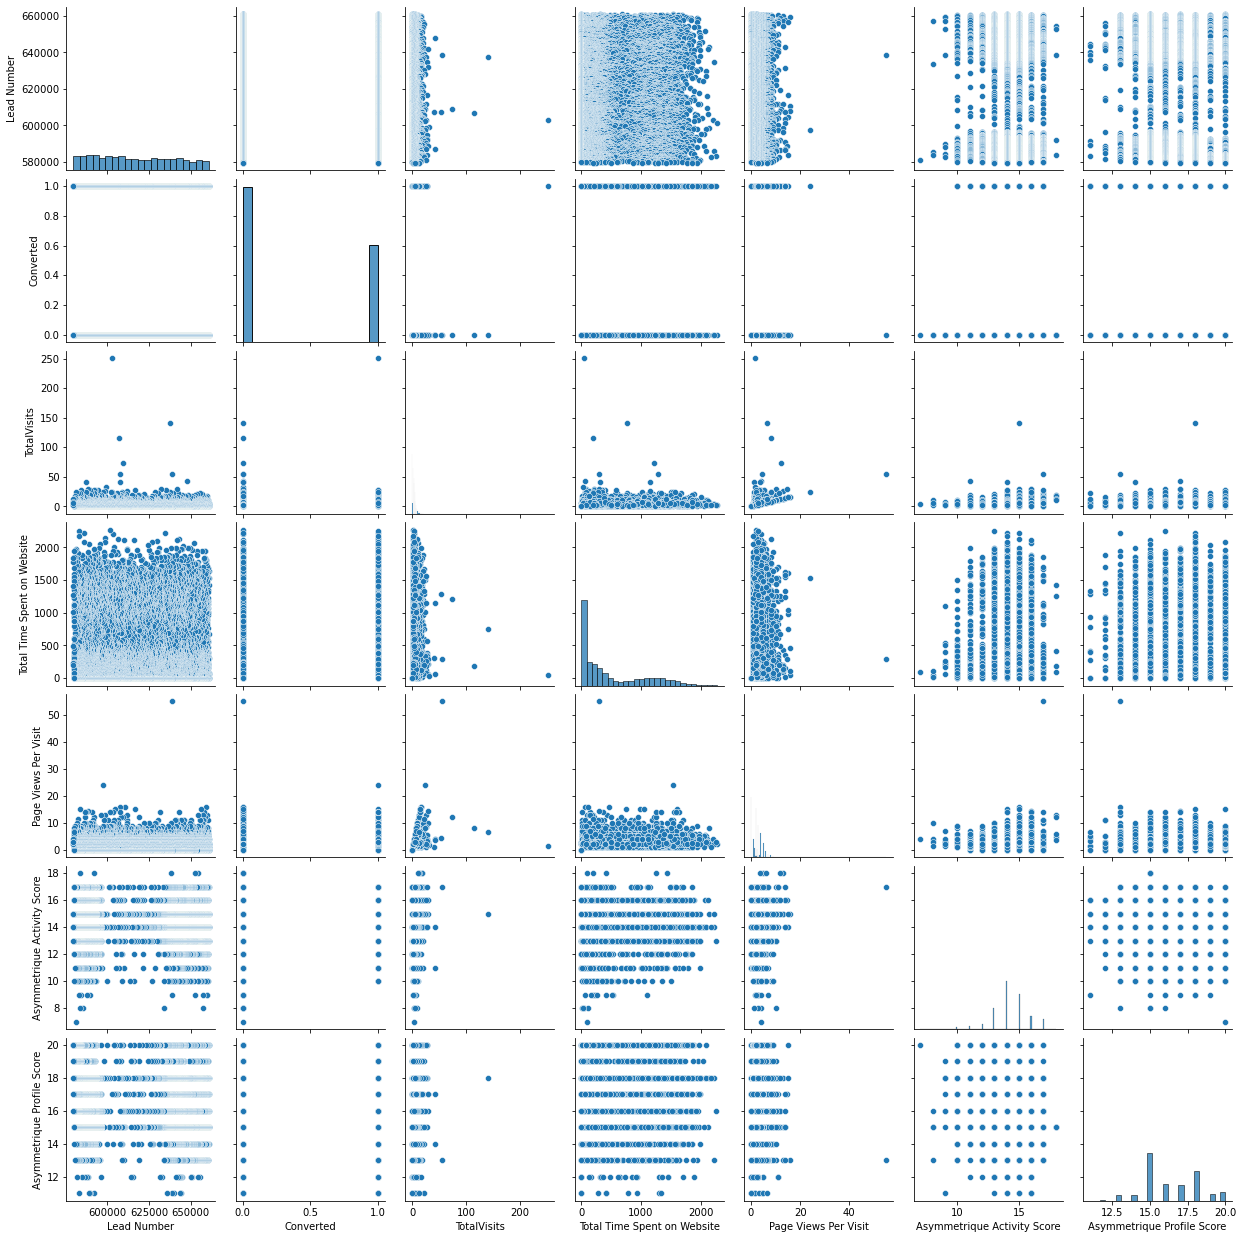

In [29]:
sns.pairplot(data = data)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

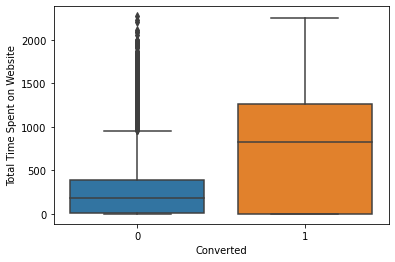

In [30]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data_new)


<AxesSubplot:xlabel='Page Views Per Visit'>

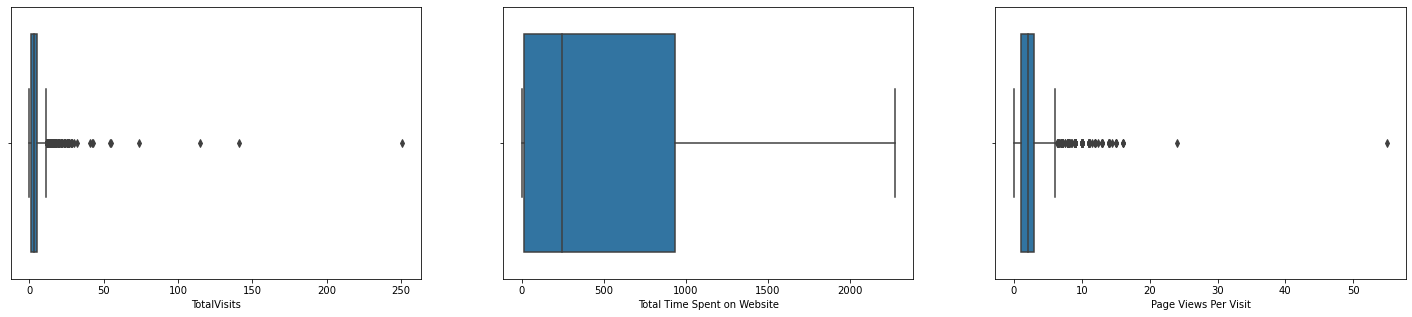

In [31]:
fig, axes = plt.subplots(1,3, figsize= [25,5])
sns.boxplot(x = 'TotalVisits', data = data_final, ax = axes[0])
sns.boxplot(x = 'Total Time Spent on Website', data = data_final, ax = axes[1])
sns.boxplot(x = 'Page Views Per Visit', data = data_final, ax = axes[2])


- `TotalVisits` and `Page Views Per Visit` have outliers which can be dealt with by grouping them in bins

-  #### Subtask 4.1: Binning `TotalVisits` and `Page Views Per Visit` into 3 groups Low, Average, HIgh and Very High to tackle outliers


In [32]:
data_final.TotalVisits.quantile([0.6, 0.9, 0.99, 1])

0.60      3.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='Visits_group', ylabel='count'>

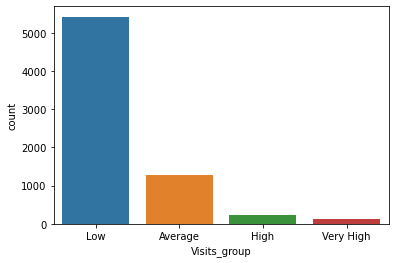

In [33]:
data_final['Visits_group'] = pd.cut(data_final.TotalVisits, bins = [0, 5, 10, 15, 500], 
                                  labels = ['Low', 'Average', 'High', 'Very High'])

sns.countplot(x = 'Visits_group', data = data_final)


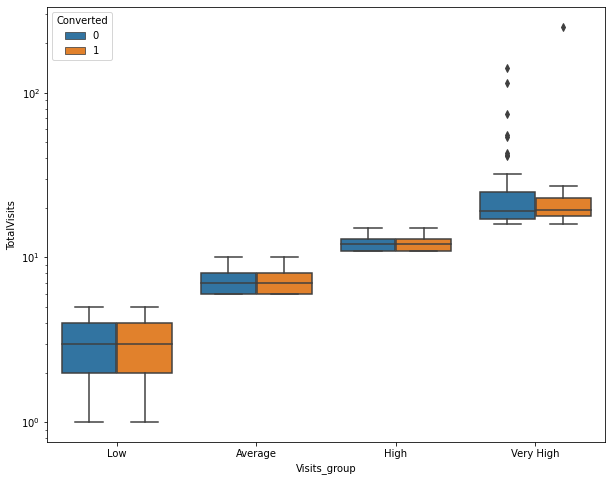

In [34]:
fig, axes = plt.subplots(figsize= [10,8])
sns.boxplot(x = 'Visits_group', y = 'TotalVisits', hue = 'Converted', data = data_final)
plt.yscale('log')

In [35]:
data_final['Page Views Per Visit'].quantile([0.6, 0.9, 0.99, 1])

0.60     2.5
0.90     5.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Views_group', ylabel='count'>

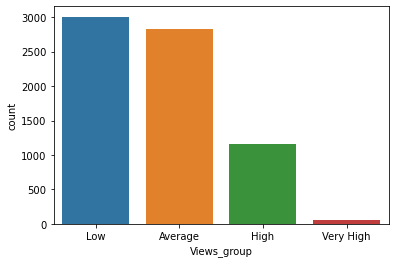

In [36]:
data_final['Views_group'] = pd.cut(data_final['Page Views Per Visit'], bins = [0, 2, 4, 10, 100], 
                                  labels = ['Low', 'Average', 'High', 'Very High'])

sns.countplot(x = 'Views_group', data = data_final)

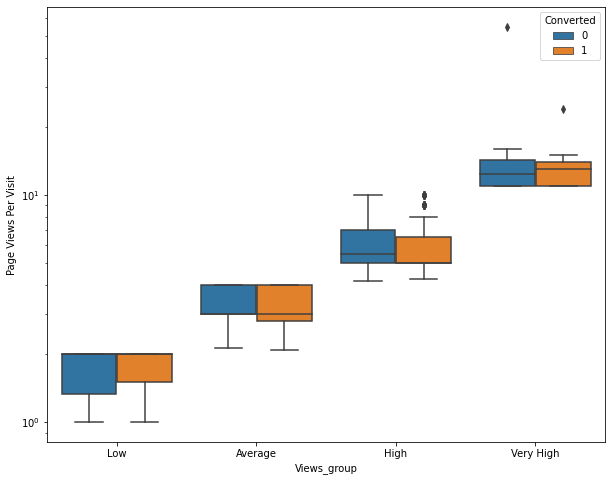

In [37]:
fig, axes = plt.subplots(figsize= [10,8])

sns.boxplot(x = 'Views_group', y = 'Page Views Per Visit', hue = 'Converted', data = data_final)
plt.yscale('log')

In [38]:
data_final.TotalVisits.quantile([0.6, 0.9, 0.99, 1])

0.60      3.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [39]:
data_final.drop(columns = ['TotalVisits', 'Page Views Per Visit'], axis = 1, inplace = True)

In [40]:
data_final = pd.get_dummies(data = data_final, columns = ['Visits_group', 'Views_group'], 
                            prefix = ['Visits', 'Views'], drop_first = True)
data_final.head()

Do Not Email  Do Not Call  Converted  Total Time Spent on Website  Search  \
0             0            0          0                            0       0   
1             0            0          0                          674       0   
2             0            0          1                         1532       0   
3             0            0          0                          305       0   
4             0            0          1                         1428       0   

   Magazine  Newspaper Article  X Education Forums  Newspaper  \
0         0                  0                   0          0   
1         0                  0                   0          0   
2         0                  0                   0          0   
3         0                  0                   0          0   
4         0                  0                   0          0   

   Digital Advertisement  ...  Current occupation_Unemployed  \
0                      0  ...                              1   
1                      0  ...                              1   
2                      0  ...                              0   
3                      0  ...                              1   
4                      0  ...                              1   

   Current occupation_Working Professional  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Choosing a course reason_Flexibility & Convenience  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Choosing a course reason_Other  Visits_Average  Visits_High  \
0                               0               0            0   
1                               0               0            0   
2                               0               0            0   
3                               0               0            0   
4                               0               0            0   

   Visits_Very High  Views_Average  Views_High  Views_Very High  
0                 0              0           0                0  
1                 0              1           0                0  
2                 0              0           0                0  
3                 0              0           0                0  
4                 0              0           0                0  

[5 rows x 39 columns]

In [41]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Do Not Email                                        9240 non-null   int64
 1   Do Not Call                                         9240 non-null   int64
 2   Converted                                           9240 non-null   int64
 3   Total Time Spent on Website                         9240 non-null   int64
 4   Search                                              9240 non-null   int64
 5   Magazine                                            9240 non-null   int64
 6   Newspaper Article                                   9240 non-null   int64
 7   X Education Forums                                  9240 non-null   int64
 8   Newspaper                                           9240 non-null   int64
 9   Digital Advertiseme

## Step 5: Splitting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = data_final.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  Total Time Spent on Website  Search  Magazine  \
0             0            0                            0       0         0   
1             0            0                          674       0         0   
2             0            0                         1532       0         0   
3             0            0                          305       0         0   
4             0            0                         1428       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  ...  Current occupation_Unemployed  \
0                        0  ...                              1   
1                        0  ...                              1   
2                        0  ...                              0   
3                        0  ...                              1   
4                        0  ...                              1   

   Current occupation_Working Professional  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Choosing a course reason_Flexibility & Convenience  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Choosing a course reason_Other  Visits_Average  Visits_High  \
0                               0               0            0   
1                               0               0            0   
2                               0               0            0   
3                               0               0            0   
4                               0               0            0   

   Visits_Very High  Views_Average  Views_High  Views_Very High  
0                 0              0           0                0  
1                 0              1           0                0  
2                 0              0           0                0  
3                 0              0           0                0  
4                 0              0           0                0  

[5 rows x 38 columns]

In [44]:
# Putting response variable to y
y = data_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Total Time Spent on Website']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.head()

Do Not Email  Do Not Call  Total Time Spent on Website  Search  \
1871             0            0                    -0.885371       0   
6795             0            0                     0.005716       0   
3516             0            0                    -0.691418       0   
8105             0            0                     1.365219       0   
3934             0            0                    -0.885371       0   

      Magazine  Newspaper Article  X Education Forums  Newspaper  \
1871         0                  0                   0          0   
6795         0                  0                   0          0   
3516         0                  0                   0          0   
8105         0                  0                   0          0   
3934         0                  0                   0          0   

      Digital Advertisement  Through Recommendations  ...  \
1871                      0                        0  ...   
6795                      0                        0  ...   
3516                      0                        0  ...   
8105                      0                        0  ...   
3934                      0                        0  ...   

      Current occupation_Unemployed  Current occupation_Working Professional  \
1871                              1                                        0   
6795                              1                                        0   
3516                              1                                        0   
8105                              1                                        0   
3934                              1                                        0   

      Choosing a course reason_Flexibility & Convenience  \
1871                                                  0    
6795                                                  0    
3516                                                  0    
8105                                                  0    
3934                                                  0    

      Choosing a course reason_Other  Visits_Average  Visits_High  \
1871                               0               0            0   
6795                               0               0            0   
3516                               0               0            0   
8105                               0               0            0   
3934                               0               0            0   

      Visits_Very High  Views_Average  Views_High  Views_Very High  
1871                 0              0           0                0  
6795                 0              0           0                0  
3516                 0              1           0                0  
8105                 0              0           1                0  
3934                 0              0           0                0  

[5 rows x 38 columns]

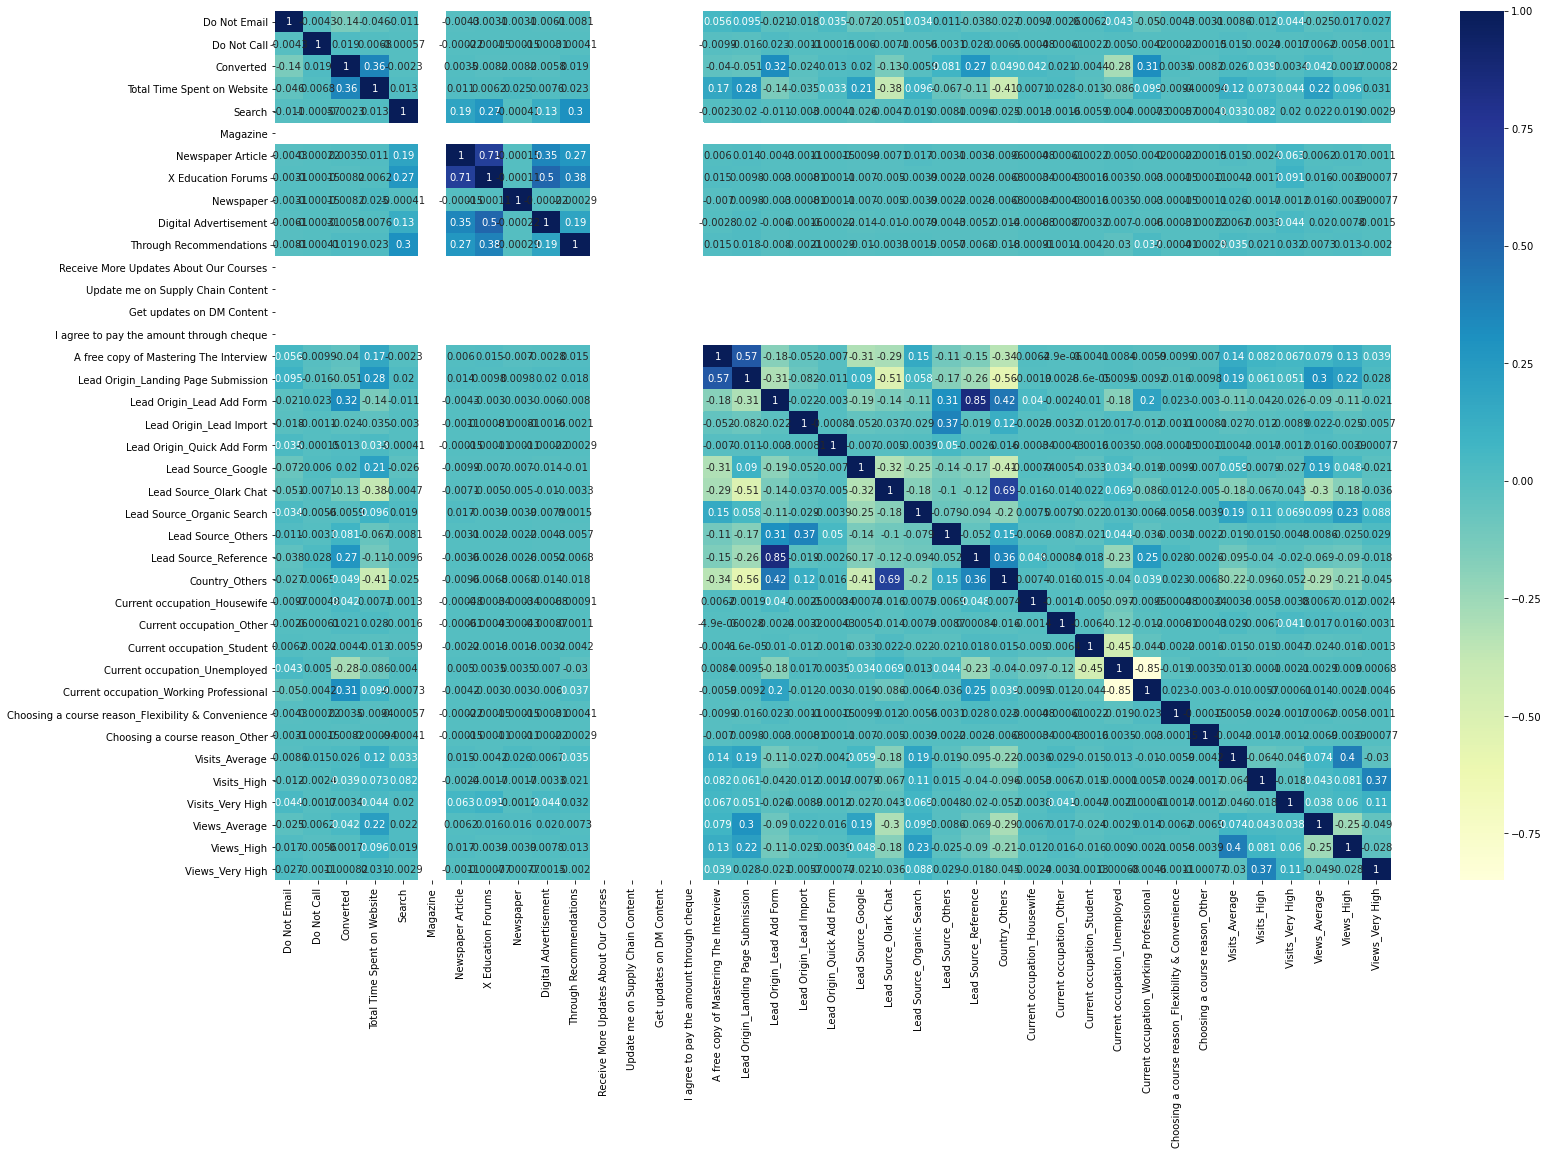

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 16))
sns.heatmap(data_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

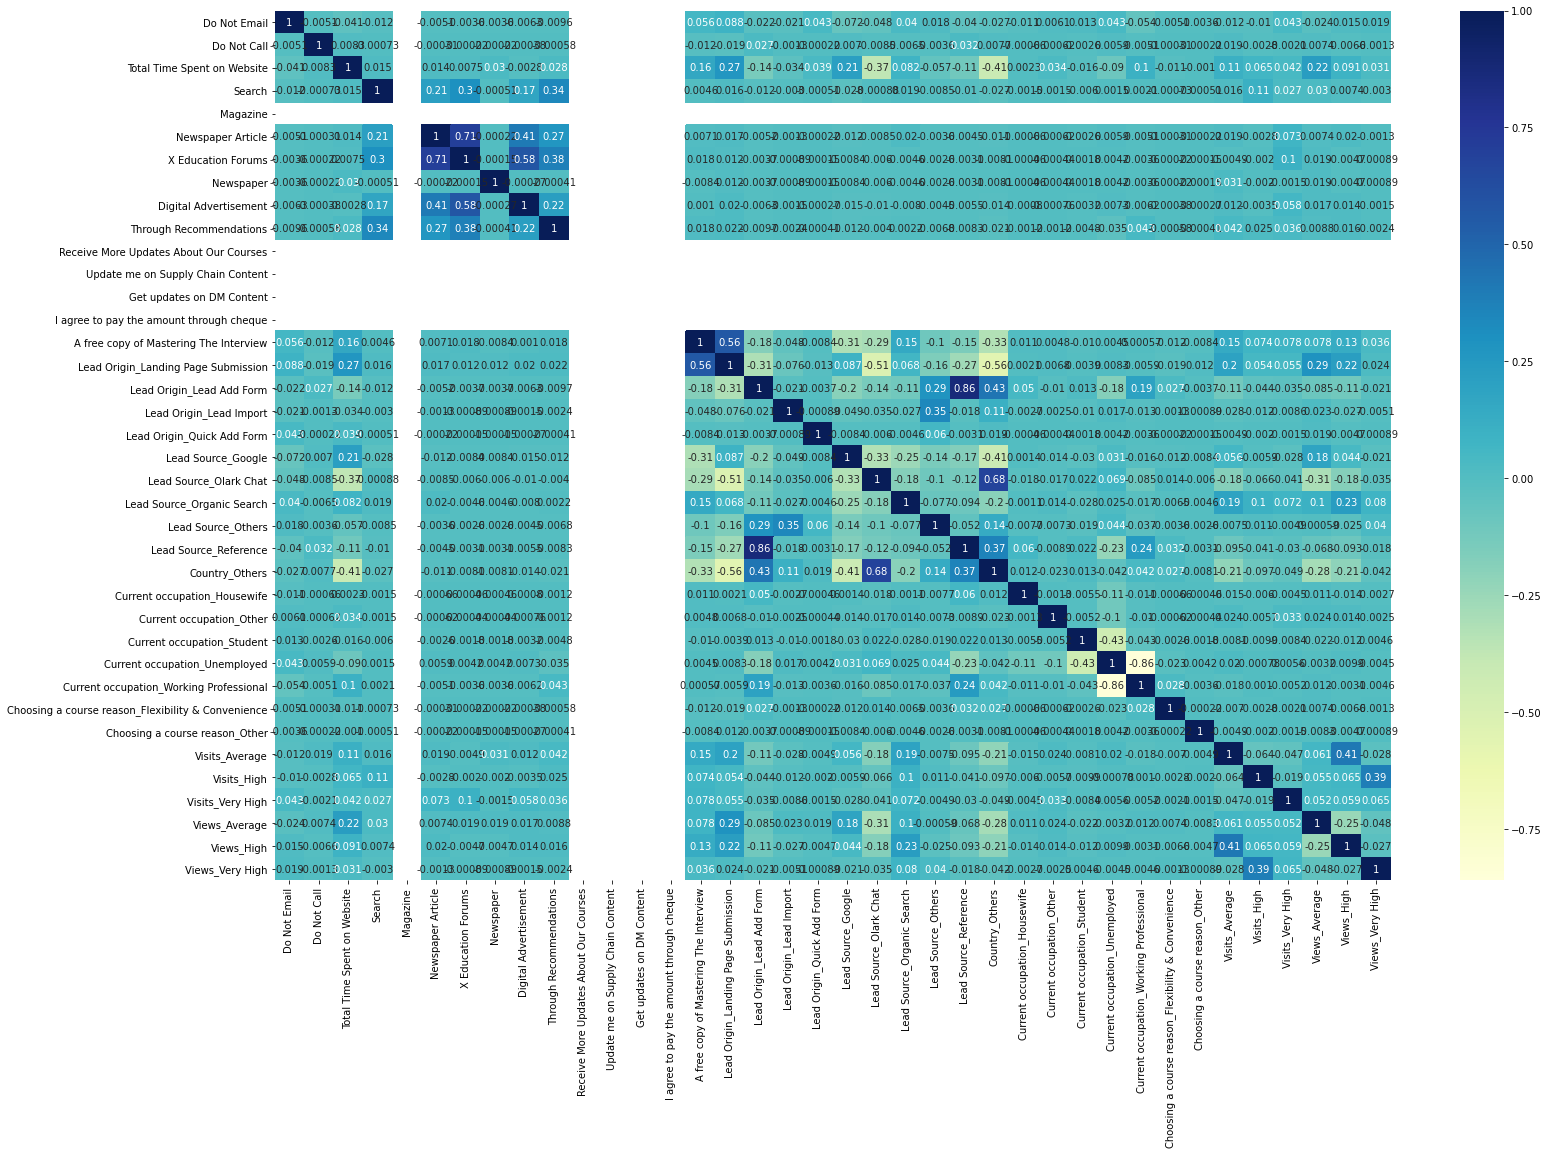

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 16))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [49]:
### Checking the Lead conversion Rate
Conversion = (sum(data_final['Converted'])/len(data_final['Converted'].index))*100
Conversion

38.53896103896104

### Step 6: Model Building
Let's start by splitting our data into a training set and a test set.

In [50]:
import statsmodels.api as sm

In [51]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 May 2021   Deviance:                          nan
Time:                        17:53:53   Pearson chi2:                 6.51e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -1.341e+15   2.76e+07  -4.86e+07      0.000   -1.34e+15   -1.34e+15
Do Not Email                                       -6.332e+14   3.16e+06     -2e+08      0.000   -6.33e+14   -6.33e+14
Do Not Call                                          1.14e+15   4.75e+07    2.4e+07      0.000    1.14e+15    1.14e+15
Total Time Spent on Website                         4.236e+14   9.41e+05    4.5e+08      0.000    4.24e+14    4.24e+14
Search                                             -1.641e+14   2.22e+07  -7.39e+06      0.000   -1.64e+14   -1.64e+14
Magazine                                              17.5935   2.74e-07   6.42e+07      0.000      17.594      17.594
Newspaper Article                                   4.472e+15   6.72e+07   6.65e+07      0.000    4.47e+15    4.47e+15
X Education Forums                                 -1.296e+15   1.11e+08  -1.17e+07      0.000    -1.3e+15    -1.3e+15
Newspaper                                          -5.154e+15   6.72e+07  -7.66e+07      0.000   -5.15e+15   -5.15e+15
Digital Advertisement                              -3.728e+15   4.76e+07  -7.84e+07      0.000   -3.73e+15   -3.73e+15
Through Recommendations                             9.693e+14   2.84e+07   3.41e+07      0.000    9.69e+14    9.69e+14
Receive More Updates About Our Courses               -15.1537   1.48e-07  -1.02e+08      0.000     -15.154     -15.154
Update me on Supply Chain Content                     -0.4913   5.26e-07  -9.34e+05      0.000      -0.491      -0.491
Get updates on DM Content                              3.5845   1.39e-07   2.58e+07      0.000       3.584       3.584
I agree to pay the amount through cheque               3.5240   7.14e-08   4.94e+07      0.000       3.524       3.524
A free copy of Mastering The Interview             -7.459e+13   2.61e+06  -2.86e+07      0.000   -7.46e+13   -7.46e+13
Lead Origin_Landing Page Submission                 6.398e+13   2.67e+06   2.39e+07      0.000     6.4e+13     6.4e+13
Lead Origin_Lead Add Form                           2.013e+15   9.31e+06   2.16e+08      0.000    2.01e+15    2.01e+15
Lead Origin_Lead Import                             1.009e+15   1.38e+07   7.32e+07      0.000    1.01e+15    1.01e+15
Lead Origin_Quick Add Form                          4.979e+15   6.77e+07   7.36e+07      0.000    4.98e+15    4.98e+15
Lead Source_Google                                  3.542e+14   2.83e+06   1.25e+08      0.000    3.54e+14    3.54e+14
Lead Source_Olark Chat                              4.001e+14   4.81e+06   8.32e+07      0.000       4e+14       4e+14
Lead Source_Organic Search                         -1.037e+12    3.2e+06  -3.24e+05      0.000   -1.04e+12  

### Step 7: Feature Selection Using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 19),
 ('Magazine', False, 21),
 ('Newspaper Article', False, 11),
 ('X Education Forums', False, 5),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 9),
 ('Receive More Updates About Our Courses', False, 20),
 ('Update me on Supply Chain Content', False, 22),
 ('Get updates on DM Content', False, 24),
 ('I agree to pay the amount through cheque', False, 23),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Origin_Quick Add Form', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Country_Others', False, 12),
 ('Current occup

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Current occupation_Housewife', 'Current occupation_Other',
       'Current occupation_Student', 'Current occupation_Unemployed',
       'Current occupation_Working Professional', 'Visits_High',
       'Views_Very High'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3020.6
Date:                Mon, 17 May 2021   Deviance:                       6041.3
Time:                        17:53:55   Pearson chi2:                 7.96e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2829      0.985     -1.303      0.193      -3.213       0.647
Do Not Email                               -1.3890      0.157     -8.819      0.000      -1.698      -1.080
Do Not Call                                22.2817   5.53e+04      0.000      1.000   -1.08e+05    1.08e+05
Total Time Spent on Website                 1.1024      0.037     29.634      0.000       1.030       1.175
Newspaper                                 -25.1515   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                     -22.4243   4.37e+04     -0.001      1.000   -8.57e+04    8.57e+04
Lead Origin_Lead Add Form                   4.7321      0.362     13.089      0.000       4.024       5.441
Lead Source_Olark Chat                      0.7572      0.091      8.285      0.000       0.578       0.936
Lead Source_Reference                      -0.9096      0.404     -2.254      0.024      -1.701      -0.119
Current occupation_Housewife               23.8138   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Current occupation_Other                   -0.1826      1.247     -0.146      0.884      -2.626       2.261
Current occupation_Student                  0.3925      1.007      0.390      0.697      -1.580       2.365
Current occupation_Unemployed               0.1893      0.984      0.192      0.848      -1.740       2.119
Current occupation_Working Professional     3.0597      1.000      3.060      0.002       1.100       5.019
Visits_High                                 0.7276      0.208      3.491      0.000       0.319       1.136
Views_Very High                            -0.6712      0.468     -1.435      0.151      -1.588       0.246
===========================================================================================================
"""

`Do Not Call` is insignificant as its p-value >0.05; it can be dropped

In [56]:
X_train_new = X_train_sm.drop(["Do Not Call"], axis = 1)

Rebuilding the model without `Do Not Call`

In [57]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.1
Date:                Mon, 17 May 2021   Deviance:                       6042.2
Time:                        17:53:55   Pearson chi2:                 7.97e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2839      0.985     -1.303      0.193      -3.215       0.647
Do Not Email                               -1.3898      0.158     -8.823      0.000      -1.698      -1.081
Total Time Spent on Website                 1.1030      0.037     29.651      0.000       1.030       1.176
Newspaper                                 -24.1530   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                     -21.4245   2.65e+04     -0.001      0.999    -5.2e+04    5.19e+04
Lead Origin_Lead Add Form                   4.7326      0.362     13.089      0.000       4.024       5.441
Lead Source_Olark Chat                      0.7574      0.091      8.287      0.000       0.578       0.937
Lead Source_Reference                      -0.9044      0.404     -2.241      0.025      -1.695      -0.113
Current occupation_Housewife               22.8140   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current occupation_Other                   -0.1821      1.247     -0.146      0.884      -2.626       2.262
Current occupation_Student                  0.3932      1.007      0.390      0.696      -1.580       2.367
Current occupation_Unemployed               0.1904      0.985      0.193      0.847      -1.740       2.120
Current occupation_Working Professional     3.0604      1.000      3.060      0.002       1.100       5.021
Visits_High                                 0.7273      0.208      3.489      0.000       0.319       1.136
Views_Very High                            -0.6713      0.468     -1.435      0.151      -1.588       0.246
===========================================================================================================
"""

`Newspaper` is insignificant as its p-value >0.05; it can be dropped

In [58]:
X_train_new = X_train_sm.drop(["Newspaper"], axis = 1)

Rebuilding the model without `Newspaper`

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3022.9
Date:                Mon, 17 May 2021   Deviance:                       6045.8
Time:                        17:53:55   Pearson chi2:                 7.96e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2826      0.985     -1.303      0.193      -3.213       0.647
Do Not Email                               -1.3884      0.157     -8.817      0.000      -1.697      -1.080
Total Time Spent on Website                 1.1007      0.037     29.623      0.000       1.028       1.173
Digital Advertisement                     -21.4241   2.65e+04     -0.001      0.999    -5.2e+04    5.19e+04
Lead Origin_Lead Add Form                   4.7306      0.362     13.085      0.000       4.022       5.439
Lead Source_Olark Chat                      0.7558      0.091      8.273      0.000       0.577       0.935
Lead Source_Reference                      -0.9041      0.404     -2.240      0.025      -1.695      -0.113
Current occupation_Housewife               22.8125   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current occupation_Other                   -0.1810      1.247     -0.145      0.885      -2.624       2.262
Current occupation_Student                  0.3924      1.007      0.390      0.697      -1.580       2.365
Current occupation_Unemployed               0.1889      0.984      0.192      0.848      -1.740       2.118
Current occupation_Working Professional     3.0594      1.000      3.060      0.002       1.100       5.019
Visits_High                                 0.7281      0.208      3.495      0.000       0.320       1.136
Views_Very High                            -0.6706      0.468     -1.434      0.152      -1.587       0.246
===========================================================================================================
"""

`Digital Advertisement	` is insignificant as its p-value >0.05; it can be dropped

In [60]:
X_train_new = X_train_sm.drop(["Digital Advertisement"], axis = 1)

Rebuilding the model without `Digital Advertisement`

In [61]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3023.8
Date:                Mon, 17 May 2021   Deviance:                       6047.5
Time:                        17:53:55   Pearson chi2:                 7.97e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.2835      0.985     -1.303      0.192      -3.214       0.647
Do Not Email                               -1.3877      0.157     -8.811      0.000      -1.696      -1.079
Total Time Spent on Website                 1.1010      0.037     29.632      0.000       1.028       1.174
Lead Origin_Lead Add Form                   4.7318      0.362     13.089      0.000       4.023       5.440
Lead Source_Olark Chat                      0.7572      0.091      8.288      0.000       0.578       0.936
Lead Source_Reference                      -0.9040      0.404     -2.240      0.025      -1.695      -0.113
Current occupation_Housewife               22.8132   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
Current occupation_Other                   -0.1805      1.247     -0.145      0.885      -2.624       2.263
Current occupation_Student                  0.3927      1.007      0.390      0.696      -1.580       2.366
Current occupation_Unemployed               0.1886      0.984      0.192      0.848      -1.741       2.118
Current occupation_Working Professional     3.0599      1.000      3.060      0.002       1.100       5.020
Visits_High                                 0.7292      0.208      3.500      0.000       0.321       1.138
Views_Very High                            -0.6707      0.468     -1.434      0.152      -1.587       0.246
===========================================================================================================
"""

`Current occupation_Housewife` is insignificant as its p-value >0.05; it can be dropped

In [62]:
X_train_new = X_train_sm.drop(["Current occupation_Housewife"], axis = 1)

Rebuilding the model without `Current occupation_Housewife`

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3027.3
Date:                Mon, 17 May 2021   Deviance:                       6054.6
Time:                        17:53:55   Pearson chi2:                 7.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.3847      0.734      0.524      0.600      -1.054       1.823
Do Not Email                               -1.3876      0.157     -8.812      0.000      -1.696      -1.079
Total Time Spent on Website                 1.0999      0.037     29.619      0.000       1.027       1.173
Lead Origin_Lead Add Form                   4.7291      0.362     13.082      0.000       4.021       5.438
Lead Source_Olark Chat                      0.7529      0.091      8.245      0.000       0.574       0.932
Lead Source_Reference                      -0.9045      0.404     -2.242      0.025      -1.695      -0.114
Current occupation_Other                   -1.8475      1.060     -1.743      0.081      -3.926       0.231
Current occupation_Student                 -1.2737      0.764     -1.667      0.095      -2.771       0.223
Current occupation_Unemployed              -1.4779      0.734     -2.013      0.044      -2.917      -0.039
Current occupation_Working Professional     1.3928      0.755      1.846      0.065      -0.086       2.872
Visits_High                                 0.7117      0.208      3.422      0.001       0.304       1.119
Views_Very High                            -0.6886      0.473     -1.457      0.145      -1.615       0.238
===========================================================================================================
"""

`Views_Very High` is insignificant as its p-value >0.05; it can be dropped

In [64]:
X_train_new = X_train_sm.drop(["Views_Very High"], axis = 1)

Rebuilding the model without `Views_Very High`

In [65]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3028.4
Date:                Mon, 17 May 2021   Deviance:                       6056.8
Time:                        17:53:55   Pearson chi2:                 7.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.3889      0.738      0.527      0.598      -1.057       1.835
Do Not Email                               -1.3948      0.157     -8.856      0.000      -1.704      -1.086
Total Time Spent on Website                 1.0992      0.037     29.618      0.000       1.026       1.172
Lead Origin_Lead Add Form                   4.7308      0.362     13.083      0.000       4.022       5.440
Lead Source_Olark Chat                      0.7530      0.091      8.248      0.000       0.574       0.932
Lead Source_Reference                      -0.9060      0.404     -2.245      0.025      -1.697      -0.115
Current occupation_Other                   -1.8500      1.063     -1.740      0.082      -3.934       0.233
Current occupation_Student                 -1.2817      0.768     -1.670      0.095      -2.786       0.223
Current occupation_Unemployed              -1.4820      0.738     -2.008      0.045      -2.929      -0.035
Current occupation_Working Professional     1.3880      0.758      1.830      0.067      -0.098       2.874
Visits_High                                 0.5881      0.191      3.086      0.002       0.215       0.962
===========================================================================================================
"""

`Current occupation_Student` is insignificant as its p-value >0.05; it can be dropped

In [66]:
X_train_new = X_train_sm.drop(["Current occupation_Student"], axis = 1)

Rebuilding the model without `Current occupation_Student`

In [67]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3030.0
Date:                Mon, 17 May 2021   Deviance:                       6059.9
Time:                        17:53:55   Pearson chi2:                 7.99e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7816      0.202     -3.861      0.000      -1.178      -0.385
Do Not Email                               -1.3983      0.157     -8.880      0.000      -1.707      -1.090
Total Time Spent on Website                 1.0995      0.037     29.632      0.000       1.027       1.172
Lead Origin_Lead Add Form                   4.7314      0.362     13.082      0.000       4.023       5.440
Lead Source_Olark Chat                      0.7512      0.091      8.230      0.000       0.572       0.930
Lead Source_Reference                      -0.8987      0.404     -2.227      0.026      -1.690      -0.108
Current occupation_Other                   -0.6793      0.791     -0.859      0.391      -2.230       0.872
Current occupation_Unemployed              -0.3115      0.203     -1.534      0.125      -0.710       0.087
Current occupation_Working Professional     2.5587      0.267      9.567      0.000       2.035       3.083
Visits_High                                 0.5981      0.190      3.141      0.002       0.225       0.971
===========================================================================================================
"""

`Current occupation_Other` is insignificant as its p-value >0.05; it can be dropped

In [68]:
X_train_new = X_train_sm.drop(["Current occupation_Other"], axis = 1)

Rebuilding the model without `Current occupation_Other`

In [69]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3030.3
Date:                Mon, 17 May 2021   Deviance:                       6060.7
Time:                        17:53:55   Pearson chi2:                 7.99e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8269      0.197     -4.208      0.000      -1.212      -0.442
Do Not Email                               -1.4006      0.158     -8.888      0.000      -1.709      -1.092
Total Time Spent on Website                 1.0985      0.037     29.630      0.000       1.026       1.171
Lead Origin_Lead Add Form                   4.7315      0.362     13.082      0.000       4.023       5.440
Lead Source_Olark Chat                      0.7519      0.091      8.239      0.000       0.573       0.931
Lead Source_Reference                      -0.8973      0.404     -2.223      0.026      -1.688      -0.106
Current occupation_Unemployed              -0.2662      0.197     -1.350      0.177      -0.653       0.120
Current occupation_Working Professional     2.6039      0.263      9.902      0.000       2.088       3.119
Visits_High                                 0.5997      0.190      3.150      0.002       0.227       0.973
===========================================================================================================
"""

`Current occupation_Unemployed` is insignificant as its p-value >0.05; it can be dropped

In [70]:
X_train_new = X_train_sm.drop(["Current occupation_Unemployed"], axis = 1)

Rebuilding the model without `Current occupation_Unemployed`

In [71]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3031.2
Date:                Mon, 17 May 2021   Deviance:                       6062.5
Time:                        17:53:55   Pearson chi2:                 8.00e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0865      0.042    -26.066      0.000      -1.168      -1.005
Do Not Email                               -1.3994      0.158     -8.879      0.000      -1.708      -1.090
Total Time Spent on Website                 1.0987      0.037     29.638      0.000       1.026       1.171
Lead Origin_Lead Add Form                   4.7266      0.362     13.071      0.000       4.018       5.435
Lead Source_Olark Chat                      0.7538      0.091      8.263      0.000       0.575       0.933
Lead Source_Reference                      -0.8839      0.403     -2.191      0.028      -1.675      -0.093
Current occupation_Working Professional     2.8628      0.180     15.890      0.000       2.510       3.216
Visits_High                                 0.6000      0.190      3.152      0.002       0.227       0.973
===========================================================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.213251
6795    0.253458
3516    0.251177
8105    0.601905
3934    0.213251
4844    0.978606
3297    0.131427
8071    0.995187
987     0.396309
7423    0.747032
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21325092, 0.25345829, 0.25117661, 0.60190509, 0.21325092,
       0.97860639, 0.13142729, 0.99518743, 0.39630858, 0.74703164])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [74]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred, 'Conversion_Score': y_train_pred*100})
y_train_pred_final['Conversion_Score'] = y_train_pred_final['Conversion_Score'].apply(lambda x: round(x,2))
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Conversion  Conversion_Prob  Conversion_Score  CustID
0           0         0.213251             21.33    1871
1           0         0.253458             25.35    6795
2           0         0.251177             25.12    3516
3           0         0.601905             60.19    8105
4           0         0.213251             21.33    3934

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.215 else 0

In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.215 else 0)

# Let's see the head
y_train_pred_final.head()

Conversion  Conversion_Prob  Conversion_Score  CustID  predicted
0           0         0.213251             21.33    1871          0
1           0         0.253458             25.35    6795          1
2           0         0.251177             25.12    3516          1
3           0         0.601905             60.19    8105          1
4           0         0.213251             21.33    3934          0

In [76]:
from sklearn import metrics

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[2909 1093]
 [ 515 1951]]


In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.75139146567718


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Conversion, y_train_pred_final.predicted, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      4002
           1       0.64      0.79      0.71      2466

    accuracy                           0.75      6468
   macro avg       0.75      0.76      0.75      6468
weighted avg       0.77      0.75      0.75      6468



#### Checking VIFs

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_new1 = X_train_sm.drop(['const'], axis=1)
X = X_train_new1

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                    Lead Source_Reference  4.24
2                Lead Origin_Lead Add Form  4.19
1              Total Time Spent on Website  1.18
3                   Lead Source_Olark Chat  1.15
5  Current occupation_Working Professional  1.13
0                             Do Not Email  1.01
6                              Visits_High  1.01

## Metrics beyond simply accuracy

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7911597729115978

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

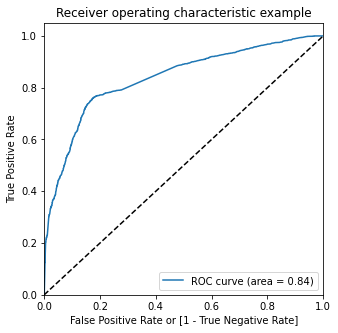

In [85]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Conversion  Conversion_Prob  Conversion_Score  CustID  predicted  0.0  0.1  \
0           0         0.213251             21.33    1871          0    1    1   
1           0         0.253458             25.35    6795          1    1    1   
2           0         0.251177             25.12    3516          1    1    1   
3           0         0.601905             60.19    8105          1    1    1   
4           0         0.213251             21.33    3934          0    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0    0    0    0  
1    1    0    0    0    0    0    0    0  
2    1    0    0    0    0    0    0    0  
3    1    1    1    1    1    0    0    0  
4    1    0    0    0    0    0    0    0

In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.431664  0.993106  0.085707
0.2   0.2  0.642239  0.892539  0.488006
0.3   0.3  0.799938  0.759530  0.824838
0.4   0.4  0.800866  0.709246  0.857321
0.5   0.5  0.787415  0.636253  0.880560
0.6   0.6  0.773810  0.547851  0.913043
0.7   0.7  0.756803  0.448500  0.946777
0.8   0.8  0.732839  0.339822  0.975012
0.9   0.9  0.695578  0.211679  0.993753


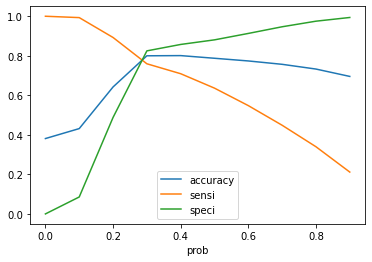

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, the optimum point is between 0.2 and 0.3 to take it as a cutoff probability.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.215 else 0)

y_train_pred_final.head()

Conversion  Conversion_Prob  Conversion_Score  CustID  predicted  0.0  0.1  \
0           0         0.213251             21.33    1871          0    1    1   
1           0         0.253458             25.35    6795          1    1    1   
2           0         0.251177             25.12    3516          1    1    1   
3           0         0.601905             60.19    8105          1    1    1   
4           0         0.213251             21.33    3934          0    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    0    0    0    0    0    0    0                0  
1    1    0    0    0    0    0    0    0                1  
2    1    0    0    0    0    0    0    0                1  
3    1    1    1    1    1    0    0    0                1  
4    1    0    0    0    0    0    0    0                0

In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.75139146567718

In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[2909, 1093],
       [ 515, 1951]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7911597729115978

### Precision and recall tradeoff

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Conversion, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

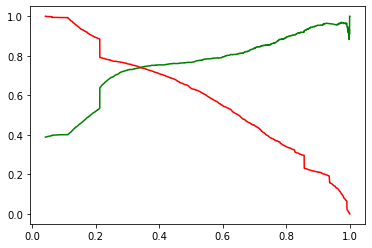

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [98]:
X_test = X_test[X_train_new1.columns]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4269             0                     0.964504                          0   
2376             0                    -0.885371                          1   
7766             0                    -0.777416                          0   
9199             0                    -0.885371                          0   
4359             0                    -0.885371                          1   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Current occupation_Working Professional  Visits_High  
4269                                        0            0  
2376                                        0            0  
7766                                        1            0  
9199                                        0            0  
4359                                        0            0

In [99]:
### Step 11: Making predictions on the test set

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.493288
2376    0.856111
7766    0.715482
9199    0.213251
4359    0.856111
9186    0.303864
1631    0.494293
8963    0.179386
8007    0.202987
5324    0.149615
dtype: float64

In [100]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.493288
2376  0.856111
7766  0.715482
9199  0.213251
4359  0.856111

In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [102]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [103]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [105]:
y_pred_final.head()

Converted  CustID         0
0          1    4269  0.493288
1          1    2376  0.856111
2          1    7766  0.715482
3          0    9199  0.213251
4          1    4359  0.856111

In [106]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [107]:
y_pred_final.head()

Converted  CustID  Conversion_Prob
0          1    4269         0.493288
1          1    2376         0.856111
2          1    7766         0.715482
3          0    9199         0.213251
4          1    4359         0.856111

In [108]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.215 else 0)

In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7467532467532467

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1203,  474],
       [ 228,  867]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7917808219178082

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.7173524150268337